In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import TensorBoard

# Intro
Saving your pre trained model will save you a lot of time . So to show how this works I have made this notebook :

In [ ]:
train = pd.read_csv("../input/ventilator-pressure-prediction/train.csv")


In [ ]:
train = train.sample(frac =.01,random_state = 90, replace = False)
train.shape

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train.info()

In [ ]:
train.corr()

In [ ]:
sns.scatterplot(x=train["pressure"],y=train['u_in'])

In [ ]:
sns.histplot( x=train["u_in"],binwidth=5 ,kde=True)

In [ ]:
train = train.drop("breath_id",axis=1)

In [ ]:
X = train.drop("pressure",axis=1)
y = train["pressure"]

# Defining,Compiling,Saving,Loading and predicting from the model

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[6]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='selu'),
    layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X, y,
    validation_data=(X, y),
    batch_size=256,
    epochs=10,
)

In [ ]:
model.save("saved_model")

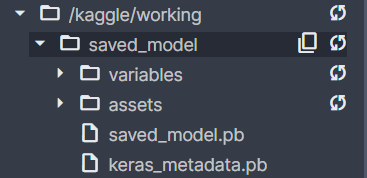

In [ ]:
loaded_model = keras.models.load_model("./saved_model")

In [ ]:
preds = loaded_model.predict(X[:1000])
mae = mean_absolute_error(y[:1000],preds)
print(mae)